### Distribution of popular online news article sharing across popular forms of media




created by John Ryan 03/10/2017

In [1]:
import pandas as pd 
import numpy as np

In [3]:
#import the data
data = pd.read_csv("C://Clusters//OnlineNewsPopularity.csv")
data.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,2013/01/07/amazon-instant-video-browser/,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


#### OnlineNewsPopularity - DataFrame Information

- Each row represents one oneline news url time delta and the corresponding features associated with it, such as number of images, minimum number of positive polarity, title subjectivity, title sentiment, number of unqique tokens, and a range of additional features that one might analyze to determine what might trigger a reader to share that particular article. The target feature for the this regression analysis is "shares" which identifies how many times has this news article been shared to social media thus helping to indicate its popularity.
- We can see we have no categorical attributes present in the data.
- There are 61 attributes in total ([39643 rows x 61 columns]>) 39643 instances which is small amount of data to work with.
- data.info below gives a view of all the features present and give a quick description for example how many rows to we have, what are the data types and the number of non-null values

In [4]:
data.info

<bound method DataFrame.info of                                                      url   timedelta  \
0               2013/01/07/amazon-instant-video-browser/         731   
1                2013/01/07/ap-samsung-sponsored-tweets/         731   
2             2013/01/07/apple-40-billion-app-downloads/         731   
3                   2013/01/07/astronaut-notre-dame-bcs/         731   
4                           2013/01/07/att-u-verse-apps/         731   
5                           2013/01/07/beewi-smart-toys/         731   
6               2013/01/07/bodymedia-armbandgets-update/         731   
7                           2013/01/07/canon-poweshot-n/         731   
8              2013/01/07/car-of-the-future-infographic/         731   
9                        2013/01/07/chuck-hagel-website/         731   
10                    2013/01/07/cosmic-events-doomsday/         731   
11                          2013/01/07/crayon-creatures/         731   
12                             2

#### Data Description

- the "std" row meaning standard deviation looks at how despersed the values are, ignoring the timedelta we see a difference in the size of the values between values which are of different scales.
- 25,50, 70% percentiles indicates the value below which a given % of observations in a group of observations fall.For example  25% of the news articles urls have a num_hrefs lower than 4, 50% lower than 8 and 75% lower than 14.



In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,...,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,354.525540,10.398759,546.514290,0.548218,0.996468,0.689177,10.883409,3.293646,4.544232,1.249905,...,0.095442,0.756721,-0.259519,-0.521932,-0.107502,0.282360,0.071427,0.341839,0.156068,3395.440607
std,214.164218,2.114063,471.113442,3.520753,5.231297,3.264858,11.332023,3.855189,8.309519,4.107902,...,0.071312,0.247786,0.127723,0.290283,0.095374,0.324248,0.265453,0.188792,0.226296,11627.091173
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470884,1.000000,0.625733,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328357,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539235,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#### Histogram 

Shows the od instances (vertical axis) that have a given range of values (horizontal axis)

some observations:
- These attributes look at they are ay complete different scales, we will need to tramform later with some type of feature scaling.


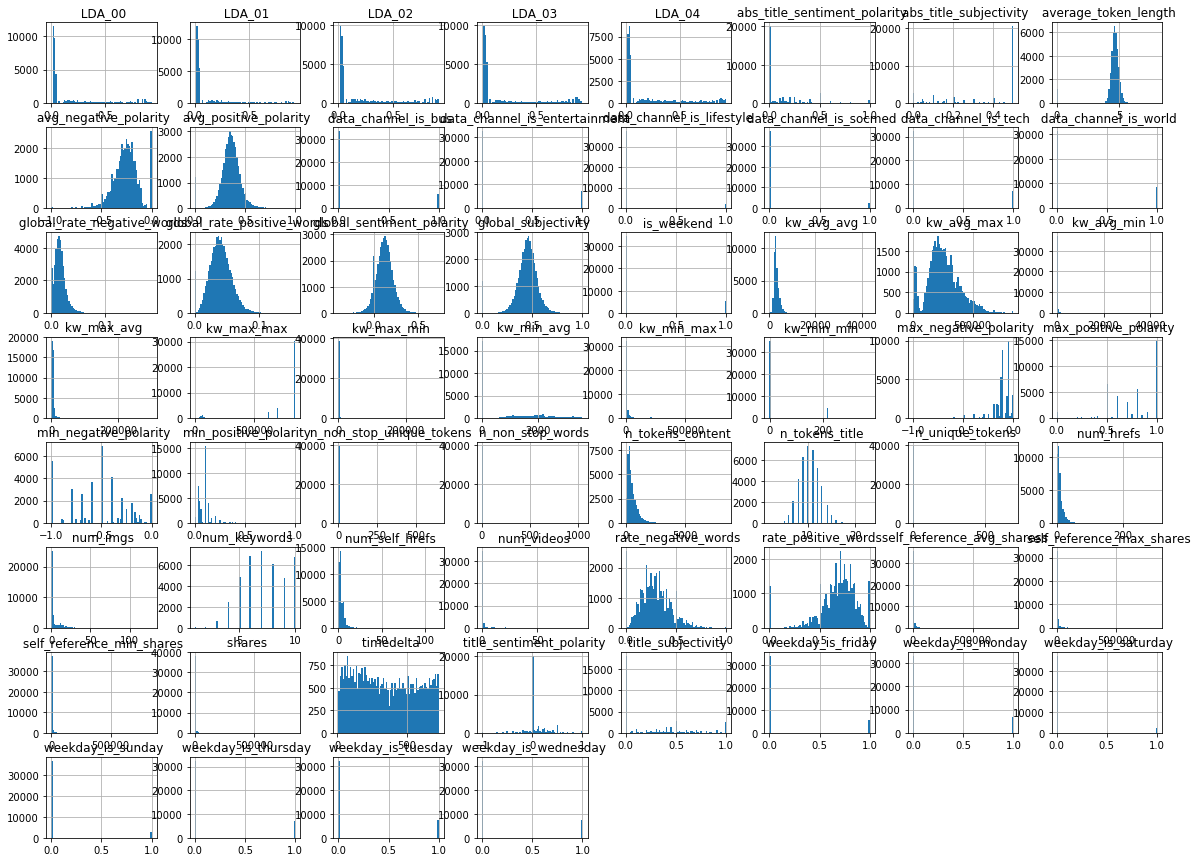

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins = 70, figsize = (20,15))
plt.show()